# Kickstarter Projects Analysis

![Kickstart official logo](./kickstarter_logo.jpg)

## Table of Contents

 1. [Introduction](#Introduction)
 2. [Importing and cleaning the data](#Importing-and-cleaning-the-data)
 3. [Cleaning the data](#Cleaning-the-data)
 4. [If data could talk](#If-data-could-talk-(we-would-all-be-fired))
 5. [Are kickstart projects able to raise any money?](#Are-kickstart-projects-able-to-raise-any-money?)
 6. [Are all kickstart projects created equal?](#Are-all-kickstart-projects-created-equal?)
 7. [Does more money mean higher success?](#Does-more-money-mean-higher-success?)
 8. [Are investors blind or do they just love losing their money investing in tech and fashion?](#Are-investors-blind-or-do-they-just-love-losing-their-money-investing-in-tech-and-fashion?)
 9. [Who said capitalism was born in the US?](#Who-said-capitalism-was-born-in-the-US?)
 10. [Key takeaways](#Key-takeaways)

## Introduction

The Kickstarter Projects dataset provides comprehensive information on various Kickstarter campaigns. This dataset is valuable for analyzing project outcomes, funding patterns, and other related metrics.

Key Features include
- Project Details: Includes information such as project names, main categories, subcategories, and launch dates, as well as country of the project.
- Funding Information: Contains data on the pledged amount, goal amount, and the converted pledged amount in USD (usd_pledged).
- Project Status: Indicates whether a project was successful, failed, canceled, or is currently live.

For more detailed information and to access the dataset, you can visit the [Kickstarter Projects dataset page on Kaggle](https://www.kaggle.com/datasets/kemical/kickstarter-projects).

## Importing and cleaning the data

### Loading the data

In [294]:
# Import all modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
from matplotlib.ticker import FuncFormatter
from IPython.display import display, HTML
from IPython.core.display import HTML as Center

#Centering the plots
Center(""" <style>
.jp-RenderedImage {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

In [263]:
# Load dataset using read_csv function
df = pd.read_csv('~/Downloads/archive/ks-projects-201801.csv', header='infer', sep=',')

## Cleaning the data
Cleaning data is crucial because it directly impacts the accuracy, consistency, and reliability of any analysis, model, or decision-making process.

In [257]:
# First glance over data using head() function
df.head()

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency    deadline     goal  \
0          Poetry    Publishing      GBP  2015-10-09   1000.0   
1  Narrative Film  Film & Video      USD  2017-11-01  30000.0   
2  Narrative Film  Film & Video      USD  2013-02-26  45000.0   
3           Music         Music      USD  2012-04-16   5000.0   
4    Film & Video  Film & Video      USD  2015-08-29  19500.0   

              launched  pledged     state  backers country  usd pledged  \
0  2015-08-11 12:12:28      0.0    failed        0      GB          0.0   
1  2017-09-02 04:43:57   2421.0    failed       15      US        100.0   
2  2013-01-12 00:20:50    220.0    failed        3      US        220.0   
3  2012-03-17 03:24:11      1.0    failed        1      US          1.0   
4  2015-07-04 08:35:03   1283.0  canceled       14      US       1283.0   

   usd_pledged_real  usd_goal_real  
0               0.0        1533.95  
1            2421.0       30000.00  
2             220.0       45000.00  
3               1.0        5000.00  
4            1283.0       19500.00

### Variables of interest

#### Variable Year
Trends are usually identified over a period of years, so a variable `year` is added. To do so, variable `launched` is used and year is extracted from it using `apply()` function.

In [264]:
# Create a new variable with only years in it (extract year from 'launched' date)
df['year'] = df['launched'].apply(lambda x: str(x)[0:4])

To get an overview of different years, function `groupby()` is used.

In [259]:
# Number of projects by year
years = df.groupby(['year']).count()
years

ID   name  category  main_category  currency  deadline   goal  \
year                                                                     
1970      7      7         7              7         7         7      7   
2009   1329   1329      1329           1329      1329      1329   1329   
2010  10519  10519     10519          10519     10519     10519  10519   
2011  26237  26236     26237          26237     26237     26237  26237   
2012  41165  41163     41165          41165     41165     41165  41165   
2013  44851  44851     44851          44851     44851     44851  44851   
2014  67745  67745     67745          67745     67745     67745  67745   
2015  77300  77300     77300          77300     77300     77300  77300   
2016  57184  57183     57184          57184     57184     57184  57184   
2017  52200  52200     52200          52200     52200     52200  52200   
2018    124    124       124            124       124       124    124   

      launched  pledged  state  backers  country  usd pledged  \
year                                                            
1970         7        7      7        7        7            7   
2009      1329     1329   1329     1329     1329         1329   
2010     10519    10519  10519    10519    10519        10519   
2011     26237    26237  26237    26237    26237        26237   
2012     41165    41165  41165    41165    41165        41163   
2013     44851    44851  44851    44851    44851        44836   
2014     67745    67745  67745    67745    67745        66993   
2015     77300    77300  77300    77300    77300        74919   
2016     57184    57184  57184    57184    57184        56537   
2017     52200    52200  52200    52200    52200        52200   
2018       124      124    124      124      124          124   

      usd_pledged_real  usd_goal_real  
year                                   
1970                 7              7  
2009              1329           1329  
2010             10519          10519  
2011             26237          26237  
2012             41165          41165  
2013             44851          44851  
2014             67745          67745  
2015             77300          77300  
2016             57184          57184  
2017             52200          52200  
2018               124            124

Year `1970` is unrealistic and it contains only 7 entries, so it should be removed. Year `2018` contains data for only a partial period, so those data will also be removed so that comparisons to other years are not skewed.

In [265]:
# Make sure to only include years that make sense, exclude 2018 because it only has partial data, exclude 1970 because it makes no sense
df = df[(df['year'] >= '2009') & (df['year'] <= '2017')]

#### Variable Country
Overview of kickstart projects by country is insightful, so list all countries to check.

In [261]:
# Number of projects by country
countries = df.groupby(['country']).count()
countries

ID    name  category  main_category  currency  deadline    goal  \
country                                                                        
AT          597     597       597            597       597       597     597   
AU         7833    7833      7833           7833      7833      7833    7833   
BE          617     617       617            617       617       617     617   
CA        14750   14750     14750          14750     14750     14750   14750   
CH          760     760       760            760       760       760     760   
DE         4169    4169      4169           4169      4169      4169    4169   
DK         1113    1113      1113           1113      1113      1113    1113   
ES         2275    2275      2275           2275      2275      2275    2275   
FR         2938    2938      2938           2938      2938      2938    2938   
GB        33655   33654     33655          33655     33655     33655   33655   
HK          618     618       618            618       618       618     618   
IE          811     811       811            811       811       811     811   
IT         2877    2877      2877           2877      2877      2877    2877   
JP           39      39        39             39        39        39      39   
LU           62      62        62             62        62        62      62   
MX         1750    1750      1750           1750      1750      1750    1750   
N,0"       3797    3797      3797           3797      3797      3797    3797   
NL         2868    2868      2868           2868      2868      2868    2868   
NO          708     708       708            708       708       708     708   
NZ         1447    1447      1447           1447      1447      1447    1447   
SE         1755    1755      1755           1755      1755      1755    1755   
SG          552     552       552            552       552       552     552   
US       292539  292536    292539         292539    292539    292539  292539   

         launched  pledged   state  backers  usd pledged  usd_pledged_real  \
country                                                                      
AT            597      597     597      597          597               597   
AU           7833     7833    7833     7833         7833              7833   
BE            617      617     617      617          617               617   
CA          14750    14750   14750    14750        14750             14750   
CH            760      760     760      760          760               760   
DE           4169     4169    4169     4169         4169              4169   
DK           1113     1113    1113     1113         1113              1113   
ES           2275     2275    2275     2275         2275              2275   
FR           2938     2938    2938     2938         2938              2938   
GB          33655    33655   33655    33655        33655             33655   
HK            618      618     618      618          618               618   
IE            811      811     811      811          811               811   
IT           2877     2877    2877     2877         2877              2877   
JP             39       39      39       39           39                39   
LU             62       62      62       62           62                62   
MX           1750     1750    1750     1750         1750              1750   
N,0"         3797     3797    3797     3797            0              3797   
NL           2868     2868    2868     2868         2868              2868   
NO            708      708     708      708          708               708   
NZ           1447     1447    1447     1447         1447              1447   
SE           1755     1755    1755     1755         1755              1755   
SG            552      552     552      552          552               552   
US         292539   292539  292539   292539       292539            292539   

         usd_goal_real    year  
country                     

There is a high chance that `N,0"` was supposed to be `NO` so these entries are replaced using `replace()` function.

In [266]:
# There is high probablity that N,0" was supposed to be NO so replace
df['country'] = df['country'].replace('N,0"', 'NO')

### Dealing with null values
This refers to handling the missing or absent data in a dataset. In many datasets, especially large or real-world ones, it’s common to encounter missing values. These null values can occur for various reasons, such as errors in data collection, incomplete data, or intentional omissions. Given that teh dataset consists of 370k entries, it is crucial that these are checked for.

In [270]:
# Initialize empty dictionary for storing null values
check_nan = {}

# Loop through the list of columns and check null values for each, if exists store how many in dictionary
for i in df.columns:
    if (df[i].isnull().values.any()) == True:
        check_nan[i] = int(df[i].isnull().values.sum())

# Printing the result
#print("Number of null values:", check_nan)

The output above indicated there are only 4 missing values in variable "name" and 3797 in variable "usd pledged":<br><br>
`Number of null values: {'name': 4, 'usd pledged': 3797}`

Since there are only a few rows with missing data (compared to 370k data entries in total) in two columns, those rows are removed for easier handling of data in further analysis.

In [220]:
# Drop the rows in which there are missing data in columns identified previously
df = df.dropna(subset=['name', 'usd pledged'])

### Dealing with duplicates
This is the process of identifying and managing duplicate records in a dataset. Duplicates can occur when the same data is entered multiple times, which can happen during data collection, merging datasets, or through errors in data entry.

In [222]:
# Checking for duplicates with "duplicated" function which creates a series of True and False values.
# If the value is True, there is a duplicate.
duplicates = df.duplicated(keep=False) # keep=False so that every True points to a duplicate (insetad of only one True for all duplicates)

# Printing the result
#print(duplicates.value_counts())

The output above indicated there are no duplicate values in the dataset:
<br><br>
`False    374729
Name: count, dtype: int64`
<br><br>

This means that no action is needed.

### Dealing with variable types
The purpose of this procedure is to ensure that all variables are or proper type, e.g. years should be formatted as integers.

In [229]:
# Loop through column names and for each print the type
def check_column_types(df):
    for col in df.columns:
        print(f"Column '{col}': {df[col].dtype}")

#check_column_types(df)

The output above indicates the following:<br><br>
`Column 'ID': int64
Column 'name': object
Column 'category': object
Column 'main_category': object
Column 'currency': object
Column 'deadline': object
Column 'goal': float64
Column 'launched': object
Column 'pledged': float64
Column 'state': object
Column 'backers': int64
Column 'country': object
Column 'usd pledged': float64
Column 'usd_pledged_real': float64
Column 'usd_goal_real': float64
Column 'year': object`<br><br>
The column `year` needs to be reformatted as integer.

In [233]:
# Use astype function to force data type on the column year
df['year'] = df['year'].astype(int)

## If data could talk <span style="font-size:60%">(we would all be fired)</span>

### Are kickstart projects able to raise any money?
When thinking of crowdfunding, one is often left wondering (or at least I am): are these projects really able to raise the money they set out to? With a platform as diverse as Kickstarter, the answer isn’t always obvious. The first glance at the data might leave us questioning whether projects are struggling to get even a modest amount of backing. However, when we take a closer look at the trend over time, it becomes clear that Kickstarter projects have not only been able to raise funds, but the average amount pledged has steadily risen since 2009. The data tells a compelling story of growth, showcasing how the platform has gained momentum and trust among backers.

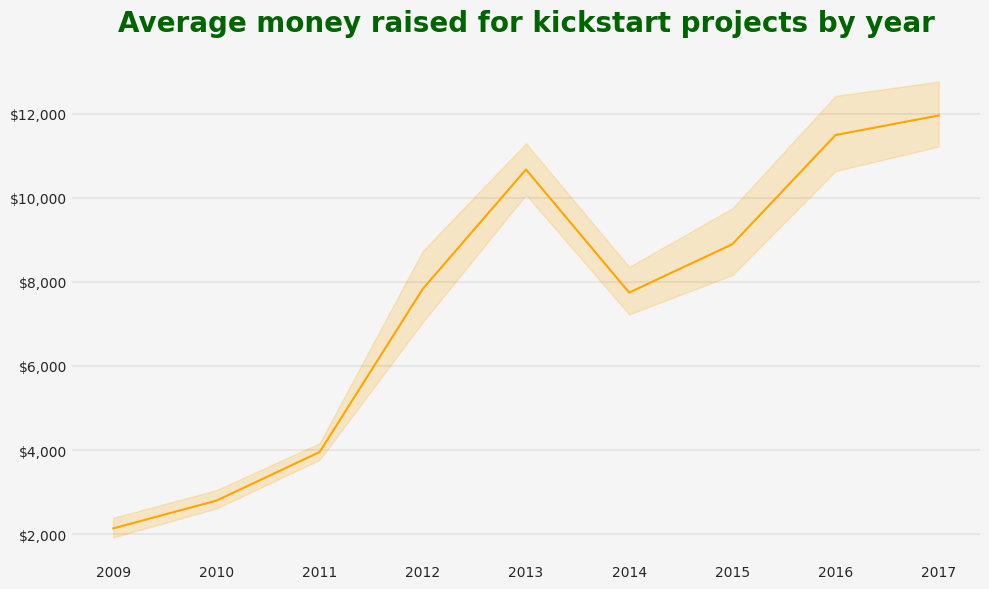

In [298]:
# Sort values so that earliest year appears to the left in the plot
filtered_df = df.sort_values(by=['year'])

# Create the plot, define size
fig, ax = plt.subplots(figsize=(10, 6))

# Create lineplot, set colors etc.
sns.lineplot(data=filtered_df, x="year", y="usd_pledged_real", ax=ax, color="orange")

# Change background colors to match
fig.patch.set_facecolor("#F5F5F5")
ax.set_facecolor("#F5F5F5")

# Set gridline color and use only y-axis grid
ax.grid(True, axis='y', color=GREY15, linestyle='-', linewidth=0.1)

# Remove the tick marks (small lines) next to the numbers
ax.tick_params(axis='both', length=0) 

# Change axis ticks and label color
ax.tick_params(axis='both', colors=GREY15)

# Change title and labels
plt.title("Average money raised for kickstart projects by year", fontsize=20, color="darkgreen", weight="bold", pad=20)
plt.xlabel(None) # Remove x-axis label
plt.ylabel(None) # Remove y-axis label

# Remove spines (box around the plot)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Define the function to format the y-axis ticks with a dollar sign
def dollar_formatter(x, pos):
    return f'${x:,.0f}'  # Adds dollar sign and comma formatting
# Apply the formatter to the y-axis
ax.yaxis.set_major_formatter(FuncFormatter(dollar_formatter))

plt.tight_layout();

As can be seen, since 2009, following the housing market crisis, there has been a steady increase in the average money raised by Kickstarter projects. The only exception is in 2014, when investments dropped by approximately 38%. However, there was a significant rebound, and just two years later, the money invested in Kickstarter projects reached an all-time high. This upward trend continued into 2017, the last year on record. Of course, this does not account for variations between categories, but it clearly shows that, overall, the amount of money being invested in Kickstarter projects is increasing, reflecting growing trust from investors in these types of ventures and signaling that the demand for quality projects remains strong.

### Are all kickstart projects created equal?
While the trendline suggests a promising rise in the average funds raised by Kickstarter projects, a closer look reveals a more nuanced story. Not all projects are created equal, and the distribution of funds across categories paints an uneven picture. It turns out that a significant chunk of the money pledged is concentrated in just a few categories - design, technology, and games - leaving other creative endeavors, like theater or dance, with a much smaller slice of the pie. This raises the question: is Kickstarter’s growth benefiting everyone equally, or are certain sectors dominating the crowdfunding landscape?

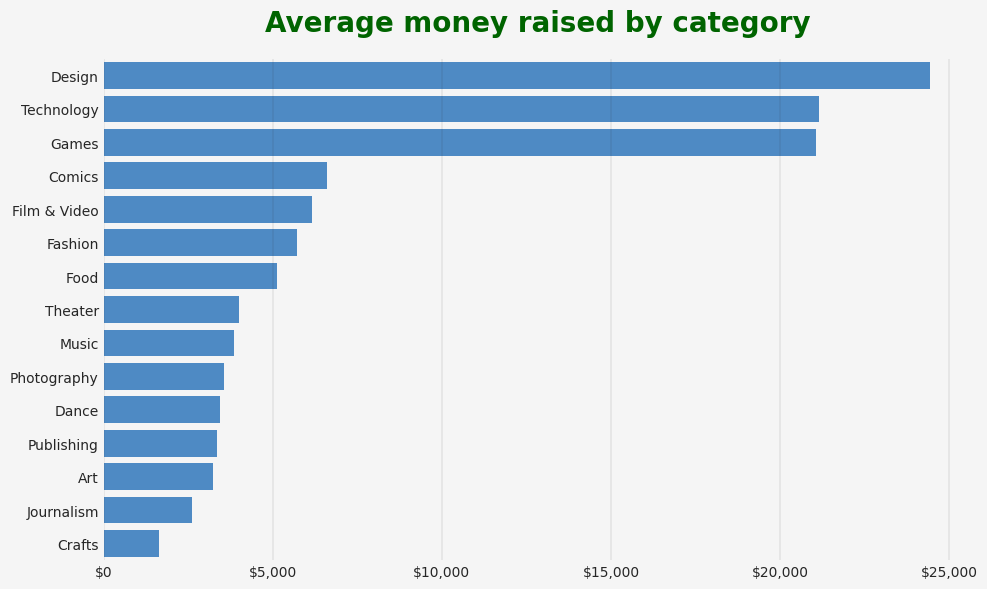

In [299]:
# Show how much money was raised by category of Kickstart project
sorted_cat = round(df.groupby('main_category')['usd_pledged_real'].mean()).reset_index()

# Sort desc so that the highest comes on top
sorted_cat = sorted_cat.sort_values(by='usd_pledged_real', ascending=False)

# Create the plot, set size
fig, ax = plt.subplots(figsize=(10, 6))

# Create barplot, set colors etc.
sns.barplot(x='usd_pledged_real', y='main_category', data = sorted_cat, color="#3A8AD8", alpha=1, errorbar = None)

# Change background colors to match
fig.patch.set_facecolor("#F5F5F5")
ax.set_facecolor("#F5F5F5")

# Set gridline color and use only y-axis grid
ax.grid(True, axis='x', color=GREY15, linestyle='-', linewidth=0.1)

# Remove the tick marks (small lines) next to the numbers
ax.tick_params(axis='both', length=0) 

# Change axis ticks and label color
ax.tick_params(axis='both', colors=GREY15)

# Change title and labels
plt.title("Average money raised by category", fontsize=20, color="darkgreen", weight="bold", pad=20)
plt.xlabel(None)
plt.ylabel(None)

# Remove spines or change their color
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Define the function to format the y-axis ticks with a dollar sign
def dollar_formatter(x, pos):
    return f'${x:,.0f}'  # Adds dollar sign and comma formatting
# Apply the formatter to the y-axis
ax.xaxis.set_major_formatter(FuncFormatter(dollar_formatter))

plt.tight_layout();

Despite the upward trend in the average money invested in Kickstarter projects, the bar chart above clearly shows that not all categories receive an equal amount of investment. This could mean two things: categories such as design, tech, and games are more popular among investors, while categories like art, journalism, and crafts seem to receive comparatively less money on average, indicating they are not as appealing to investors. Another factor to consider is that the more popular categories may be asking for higher funding amounts, while the poorer-performing categories may simply require less capital to kickstart their projects (pun intended).

### Does more money mean higher success?
It wouldn't be crazy to assume that projects raising more money are more likely to succeed, but the data tells a different story. While categories like tech, fashion, and games attract the lion’s share of pledges, it’s the seemingly less glamorous categories like dance, theater, and comics that are outpacing them in terms of success. This raises an important question: Does a larger pledge pool guarantee success, or are other factors at play in determining the true winners on Kickstarter?

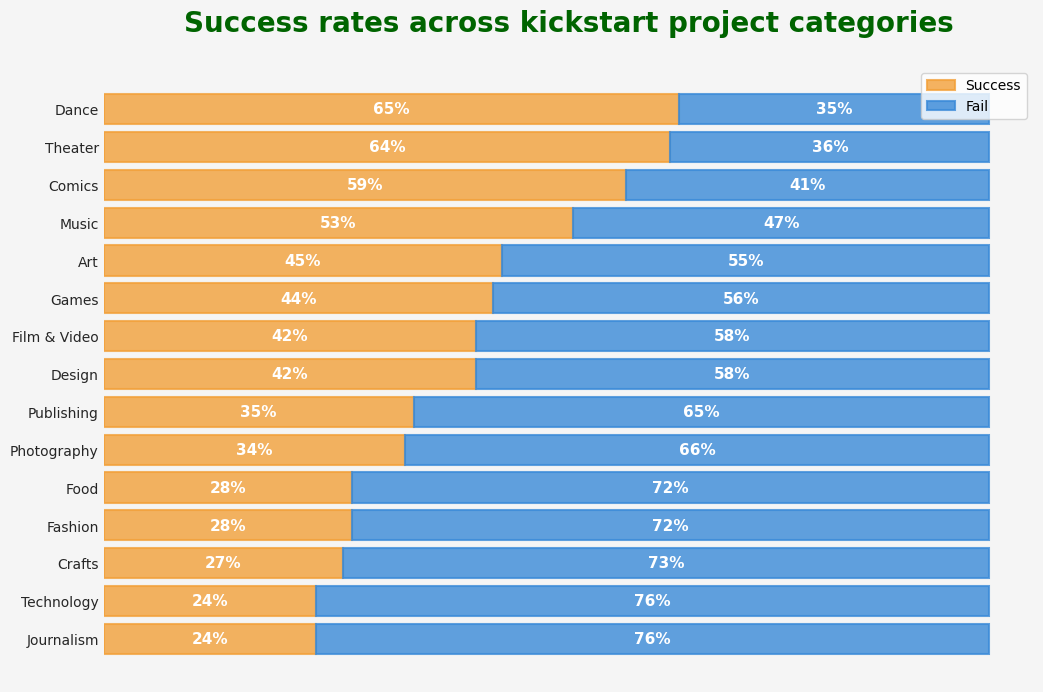

In [300]:
# Create series with only succesful and failed projects
successful_only = df[(df['state'] == 'successful')]
failed_only = df[(df['state'] == 'failed')]

# Group them by main_category
successful = successful_only.groupby('main_category').state.count().reset_index()
failed = failed_only.groupby('main_category').state.count().reset_index()

# Transform series to DFs
s_df = pd.DataFrame(successful)
f_df = pd.DataFrame(failed)

# Merge DFs with main_category as index
df1 = pd.merge(s_df, f_df, on='main_category')

# Rename variables (columns) for clarity
df1.rename(columns={'state_x': 'successful'})
df1.rename(columns={'state_y': 'failed'})

# Add columns success and fail and calculate percentages for each
df1['success'] = round(((df1['state_x'])/(df1['state_x']+df1['state_y']))*100)
df1['fail'] = round(((df1['state_y'])/(df1['state_x']+df1['state_y']))*100)

# Sort success rates
df1 = df1.sort_values(by='success', ascending=True)

# Create the plot, set size
fig, ax = plt.subplots(figsize=(12, 8))

# Add stacked horizontal bar chart
ax.barh(df1.main_category, df1.success, label="Success", color="#F2A039", alpha=0.8, edgecolor="#F2A039", linewidth=1.5)
ax.barh(df1.main_category, df1.fail, left=df1.success, label="Fail", color="#3A8AD8", alpha=0.8, edgecolor="#3A8AD8", linewidth=1.5)

# Add labels to the bars
for bar in ax.patches:
    ax.text(bar.get_width() / 2 + bar.get_x(),  # Position of the text: middle of the bar
            bar.get_y() + bar.get_height() / 2,   # Position vertically in the center of the bar
            f"{round(bar.get_width())}%", 
            va='center', ha='center',   # Align the text to the center of the bar
            color="#ffffff", weight="bold",  size=11)

# Set title and labels
ax.set_title("Success rates across kickstart project categories", fontsize=20, color="darkgreen", weight="bold", pad=25)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_xticks([])

# Change axis ticks and label color
ax.tick_params(axis='both', colors="#262626")

# Remove the tick marks (small lines) next to the numbers
ax.tick_params(axis='both', length=0) 

# Remove spines or change their color
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Set background color
fig.set_facecolor("#F5F5F5")
ax.set_facecolor("#F5F5F5")

# Show the legend
ax.legend()

# Show the plot
plt.show();

As shown in the plot above, the top three most successful categories are dance, theater, and comics, while in terms of average money raised, they rank 11th, 8th, and 4th, respectively. This suggests that simply investing more money in a project does not always lead to higher success. There could be various reasons for this, but the data reveals that the relatively higher failure rates in the most well-funded categories - such as design, tech, and fashion - are not necessarily attributable to the amount of money invested, especially when compared to the higher success rates of the less-funded categories. This raises a crucial question: what makes these well-funded categories more appealing to investors? We now know for certain the answer is not high chances of success.

### Are investors blind or do they just love losing their money investing in tech and fashion?
While it may seem like investors are simply betting on the ‘shiny’ allure of tech and fashion, the data paints a more nuanced picture. Despite their initial popularity and heavy investment, these categories have struggled to achieve high success rates - 28% for fashion and 24% for tech. On the other hand, more traditional categories like dance, theater, and comics have consistently outperformed, with success rates soaring to 65%, 64%, and 59%, respectively. But here’s the twist: as investor attention shifts away from the riskier, flashy projects, categories with higher success rates are on the rise. Let’s explore how the landscape is evolving, with successful categories gaining momentum while tech and fashion start to lose their shine.

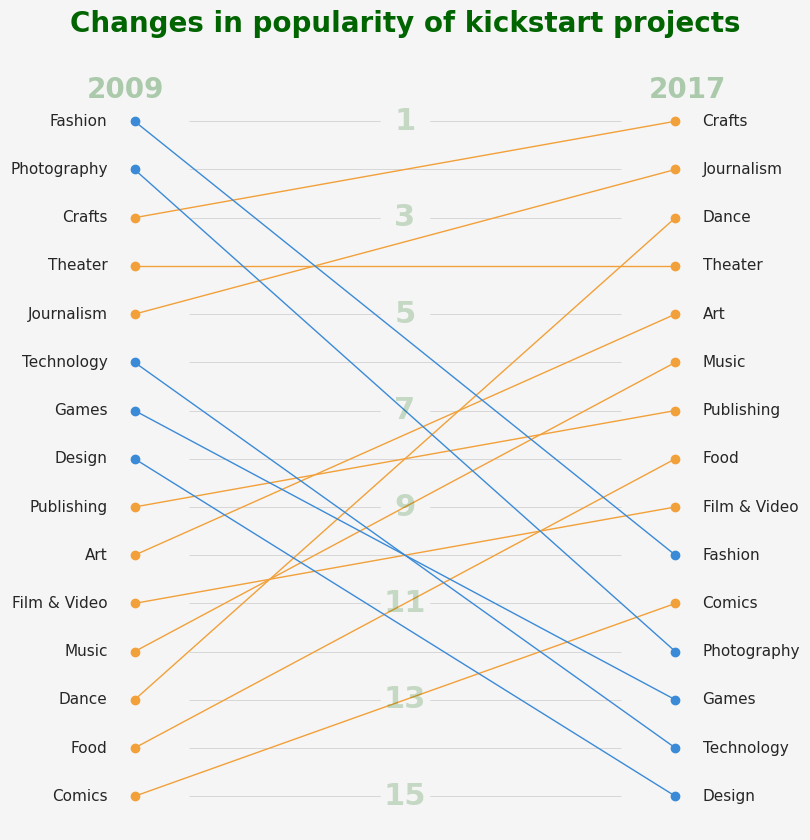

In [302]:
# Create a new dataframe
#df_years = df

# Create a new variable with only years in it (extract year from 'launched' date)
#df_years['year'] = df['launched'].apply( lambda x: str(x)[0:4] )

# Step 1.1: Filter for year 2009
df_2009 = df[df['year'] == '2009']

# Step 1.2: Group by category and calculate the average money raised
avg_money_raised_2009 = round(df_2009.groupby('main_category')['usd_pledged_real'].mean()).reset_index()

# Step 1.3: Sort by avg. money raised - biggest on top
avg_money_raised_2009 = avg_money_raised_2009.sort_values(by='usd_pledged_real', ascending=False)

# Step 1.4: Add rank for later
avg_money_raised_2009['rank_2009'] = range(1, len(avg_money_raised_2009) + 1)

# Step 1.5: Rename column to 2009
avg_money_raised_2009 = avg_money_raised_2009.rename(columns={'usd_pledged_real': 'usd_2009'})

# Step 2.1: Filter for year 2017
df_2017 = df[df['year'] == '2017']

# Step 2.2: Group by category and calculate the average money raised
avg_money_raised_2017 = round(df_2017.groupby('main_category')['usd_pledged_real'].mean()).reset_index()

# Step 2.3: Sort by avg. money raised - biggest on top
avg_money_raised_2017 = avg_money_raised_2017.sort_values(by='usd_pledged_real', ascending=False)

# Step 2.4: Add rank for later
avg_money_raised_2017['rank_2017'] = range(1, len(avg_money_raised_2017) + 1)

# Step 2.5: Rename column to 2017
avg_money_raised_2017 = avg_money_raised_2017.rename(columns={'usd_pledged_real': 'usd_2017'})

# Step 3: Merge the two DFs using main_category as index
merged_df = pd.merge(avg_money_raised_2009, avg_money_raised_2017, on='main_category')

# Step 4: Create series with values from categories, and 2009 and 2017 data for easier use with for loops
categories = merged_df["main_category"].values
dat_09 = merged_df["rank_2009"].values
dat_17 = merged_df["rank_2017"].values

# Step 5: All regarding the plot

# Set colors for each point depending on whether the trend is increas or decrease in popularity
color =  np.where(merged_df["rank_2009"] > merged_df["rank_2017"], BLUE, ORANGE)

# Initialize plot, set size
fig, ax = plt.subplots(figsize = (7, 9))

# Adjust figure margins, this is going to be useful later.
fig.subplots_adjust(left=0.05, right=0.90, top=0.9, bottom=0.075)

# Set background color
fig.set_facecolor("#F5F5F5")
ax.set_facecolor("#F5F5F5")

# Iterate over ages, colors, and sizes, adding one line and pair of dots at a time
# Note the horizontal positions are fixed at 1 and 2.
for y0, y1, c in zip(dat_09, dat_17, color):
    ax.plot([1, 2], [y0, y1], c=c, lw=1)
    ax.scatter(1, y0, c = c, zorder=10)
    ax.scatter(2, y1, c = c, zorder=10)

# Space between the dot and the label - for easier use later
TEXT_HPADDING = 0.05

# Plot the points
for i, name in enumerate(categories):
    x = 1 - TEXT_HPADDING # offset from points
    y = dat_09[i] #actual names of categories
    ax.text(x, y, name, size=11, color=GREY15, ha="right", va="center")

    x = 2 + TEXT_HPADDING
    y = dat_17[i]
    ax.text(x, y, name, size=11, color=GREY15, va="center" )

# Remove all spines
ax.set_frame_on(False)

# Remove horizontal and vertical ticks
ax.set_xticks([])
ax.set_yticks([])

# Add annotations
ax.text(1.055, 15.65, "2009", size=20, color="darkgreen", weight="bold", alpha=0.3, va="center", ha="right")
ax.text(1.95, 15.65, "2017", size=20, color="darkgreen", weight="bold", alpha=0.3, va="center", ha="left")

# Note the dots added with ax.scatter are the text backgrounds
for y in np.arange(1, 16, 2):
    ax.scatter(1.5, y, s=1200, color="#F5F5F5")
    ax.text(1.5, y, str(16-y), size=22, color="darkgreen", weight="bold", alpha=0.2, va="center", ha="center")

# Horizontal lines in the background
ax.hlines(np.arange(1, 16), 1.1, 1.9, alpha=0.2, lw=0.5, color=GREY15, zorder=0)

# Set title with padding from the top (pad=20)
ax.set_title("Changes in popularity of kickstart projects", fontsize=20, color="darkgreen", weight="bold", pad=40);

Once popularity is taken into account, it becomes clear that, without exception, all three of the most well-endowed categories, in line with their poor performance in terms of success, are losing popularity. Fashion, for instance, was the most popular category in terms of average money raised in 2009. However, by 2017, it had dropped significantly to 10th place. A similar decline can be observed for tech and games, which were ranked 6th and 7th in 2009 in terms of average funding, but by 2017, they had fallen to 13th and 14th place, respectively. Meanwhile, dance has seen the most significant rise, climbing from 13th place in 2009 to 3rd in 2017. Music also showed considerable improvement, moving up 6 places from 12th to 6th, while art climbed 5 places, from 10th to 5th. These trends, despite the ongoing hype and high investment amounts in categories like tech and fashion, indicate a shift in investor focus toward other categories. These may be less flashy, but certainly offer higher returns in terms of success, as shown in the [Does more money mean higher success?](#Does-more-money-mean-higher-success?) chart.

### Who said capitalism was born in the US?
The rise of crowdfunding platforms has undoubtedly revolutionized the way creative projects come to life. Among these platforms, Kickstarter has stood out as a symbol of entrepreneurial freedom. But where are the majority of these ventures originating from? While one might imagine a more global spread, the data reveals a striking truth: the overwhelming majority of projects are born in the United States. It’s almost as if the entrepreneurial spirit is inextricably tied to the American Dream. Let’s dive into the numbers to see just how prominent the US is in this global crowdfunding phenomenon.

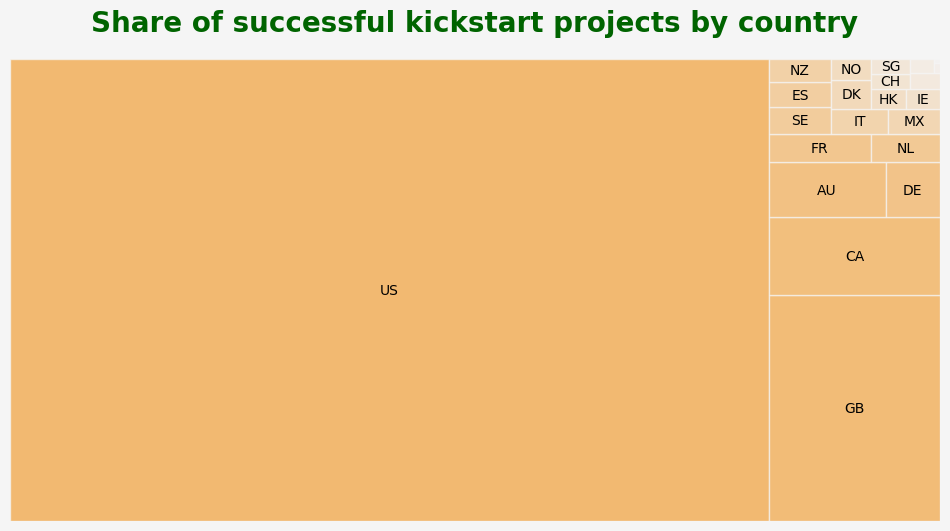

In [303]:
# Filter out everything except for projects that were success
success_df = df[(df['state'] == 'successful')]

# Number of successful projects by country
countries = success_df.groupby(['country']).count().reset_index()

# Sort by desc so that the largest square is to the left
countries = countries.sort_values(by=['ID'], ascending=False)

# Normalize sizes of boxes, set a threshold so that not all boxes are filled with text, only the largest ones
largest_size = max(countries.ID)
threshold = 0.0014 * largest_size  # Only label squares with at least 0.14% of the largest size

# Generate labels: only show for big squares
labels = [cat if size >= threshold else "" for cat, size in zip(countries.country, countries.ID)]

# Create a color palette from a base color (ORANGE) with variations in hue
base_color = ORANGE
colors = sns.light_palette(base_color, n_colors=len(labels))  # Generates shades from the base color

# Create the plot
fig, ax = plt.subplots(figsize=(12,6))
squarify.plot(sizes=countries['ID'], label=labels, color=colors[::-1], ec="#F5F5F5", alpha=0.7, ax=ax)

# Change background colors to match
fig.patch.set_facecolor("#F5F5F5")
ax.set_facecolor("#F5F5F5")

# Remove axes
plt.axis("off")

# Rename plot
plt.title("Share of successful kickstart projects by country", fontsize=20, color="darkgreen", weight="bold", pad=20)

plt.show();

Finally, geography can reveal insights that people often overlook. The chart above clearly shows that the vast majority of Kickstarter projects are launched in the United States. In the not-so-close second place is the United Kingdom, followed closely by Canada and Australia - all English-speaking countries. This group is then followed by other European countries such as Germany, France, and the Netherlands. These countries are commonly referred to as ‘The West’. One could reasonably conclude that the shared values of these countries, such as democracy and free markets, combined with their high standards of living, help fuel entrepreneurship and a desire to solve problems for others. After all, that’s what business is meant to do, right? Certainly, Americans would agree.

## Key takeaways
- **Kickstarter Projects and Growth:** Since 2009, Kickstarter has seen a steady increase in average money raised, especially following the housing-market crisis. This growth signals increasing investor confidence in Kickstarter projects, with more funds being poured into the platform each year, highlighting its rising popularity.
- **Investors’ Focus on Popular Categories:** Despite the overall rise in money raised, certain categories like design, tech, and games continue to dominate the funding landscape. However, less flashy categories like art, music, and theater are also showing promise with higher success rates, suggesting that investors are beginning to favor projects with higher potential for returns.
- **Success Doesn’t Always Follow Funding:** The correlation between money raised and project success is weak. Categories like dance, theater, and comics, while receiving comparatively less funding, are some of the most successful, challenging the assumption that more money equals higher success.
- **Shifting Investor Interest:** Categories such as tech, fashion, and games, which once enjoyed top positions in terms of funding, have seen a decline in popularity. Conversely, categories like dance, music, and art are climbing in popularity, showing that investors are diversifying their interests and moving away from traditionally overfunded sectors.
- **Geographic Trends:** The majority of Kickstarter projects originate from the United States, followed by other English-speaking countries like the UK, Canada, and Australia. This suggests that shared cultural and economic factors, such as democratic values and free-market economies, play a significant role in fostering entrepreneurial spirit and driving the success of Kickstarter projects.